# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Open the data

As in this script we will just define clusters, it is better to use the dataframe that contains the filtered data but with the z-scores, that show us the relative expression of each gene around all the samples.

In [2]:
file_path = '/Volumes/TOSHIBA EXT/4t curs/Advanced Bioinformatics/Project/Python/filtered_zdata.csv'
df = pd.read_csv(file_path, index_col = 0)
df.head(5)

77322072-2a7f-49e6-a9d1-c521c25acd70.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                                0.092111                             
STPG1                                               0.552576                             
CFTR                                               -0.846844                             
HS3ST1                                              0.838805                             
AOC1                                                2.069025                             

           6f6bf240-1ca4-47d0-9a77-17b0ce9b8ae7.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                                0.024984                             
STPG1                                               0.284289                             
CFTR                                                0.454121                             
HS3ST1                                              0.845227                             
AOC1                                                2.289553                             

           59e8b7b7-5183-4655-aa5e-e4b5ba73eded.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                                0.431789                             
STPG1                                               0.695884                             
CFTR                                                0.760540                             
HS3ST1                                              1.338536                             
AOC1                                               -0.539441                             

           5418228b-cfd0-4580-87c6-3ebf6282ad73.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                               -0.081735                             
STPG1                                               1.385648                             
CFTR                                               -0.153852                             
HS3ST1                                             -0.399694                             
AOC1                                                1.117246                             

           c7fd0bf8-753e-45d6-b987-51ec7559f728.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                               -0.660668                             
STPG1                                               0.644138                             
CFTR                                                1.063540                             
HS3ST1                                             -0.320215                             
AOC1                                                0.327052                             

           50c308c9-922a-4083-ae09-e5e4d8c437af.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                                1.807572                             
STPG1                                               0.401659                             
CFTR                                               -1.075996                             
HS3ST1                                              0.531127                             
AOC1                                               -0.294580                             

           55071ef3-bf09-43a2-a54c-a9ec61a84615.rna_seq.augmented_star_gene_counts.tsv  \
gene_name                                                                                
GCLC                                         

# Clustering

To visualize the created clusters using the K-means method, we will perform a PCA for each K value.

## Calinski - Harabasz analysis for K-means clustering

When using Calinsky - Harabasz analysis to evaluate K-means clustering performance, as more high the score is the better clusters are defined in the model. The given index/score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters.

Number of Clusters: 2, Calinski-Harabasz Analysis Index: 1448.28


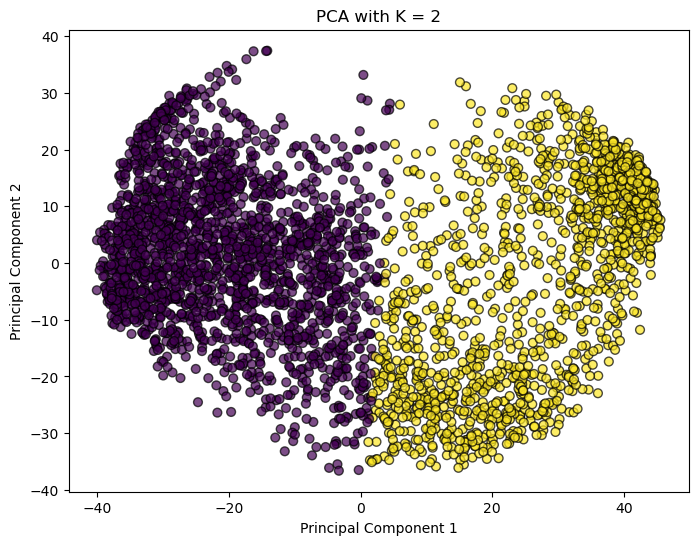

Number of Clusters: 3, Calinski-Harabasz Analysis Index: 1072.24


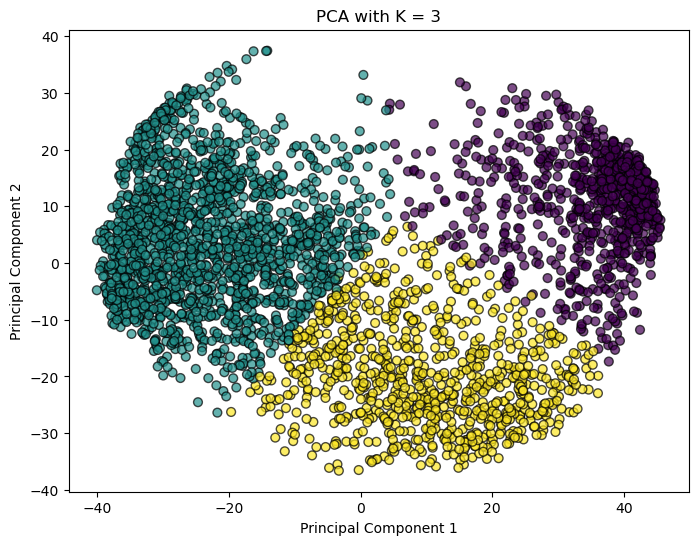

Number of Clusters: 4, Calinski-Harabasz Analysis Index: 820.76


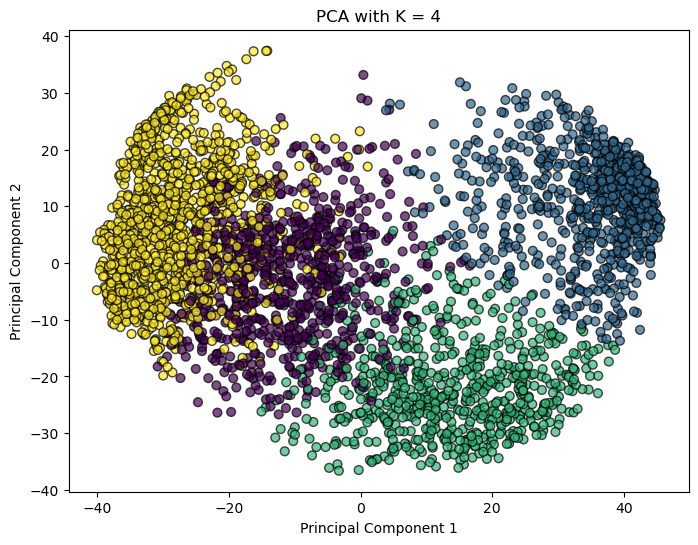

Number of Clusters: 5, Calinski-Harabasz Analysis Index: 674.28


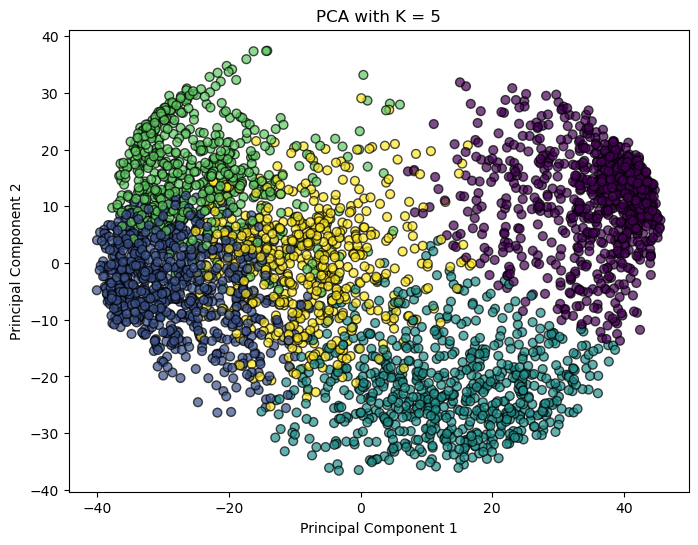

Number of Clusters: 6, Calinski-Harabasz Analysis Index: 577.41


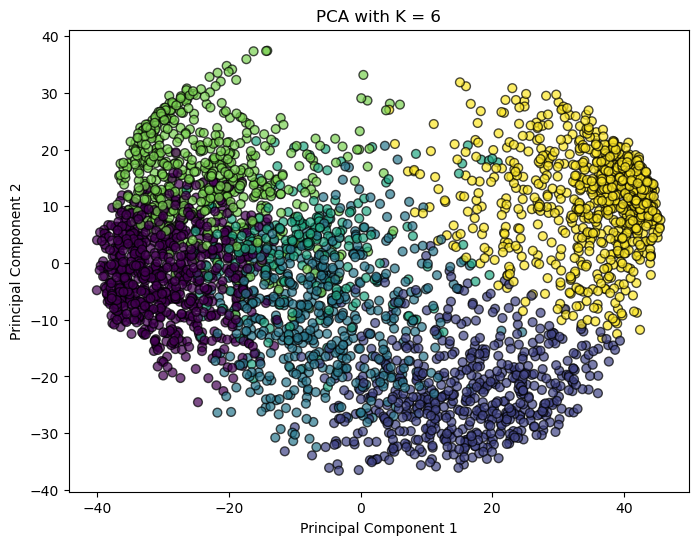

Number of Clusters: 8, Calinski-Harabasz Analysis Index: 454.02


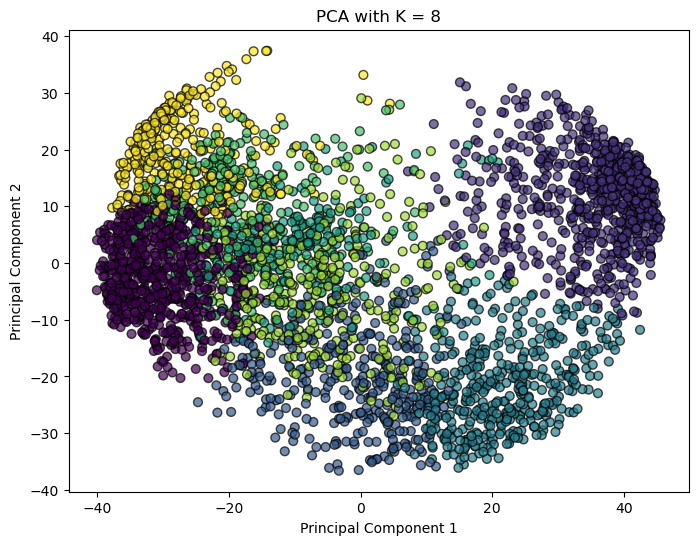

In [3]:
n_cluster = [2, 3, 4, 5, 6, 8]

for clusters in n_cluster:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(df)
    
    calinski_harabasz_index = calinski_harabasz_score(df, cluster_labels)
    print(f'Number of Clusters: {clusters}, Calinski-Harabasz Analysis Index: {calinski_harabasz_index:.2f}')
    
    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(df)
    plt.figure(figsize = (8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = .7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

## Davies Bouldin analysis for K-means clustering

The Davies-Bouldin index can also be used to evaluate the model, where a lower Davies-Bouldin index relates to a model with better separation between the clusters, being 0 the lowest possible score. This index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

Number of Clusters: 2, Davies Bouldin Analysis Index: 1.52


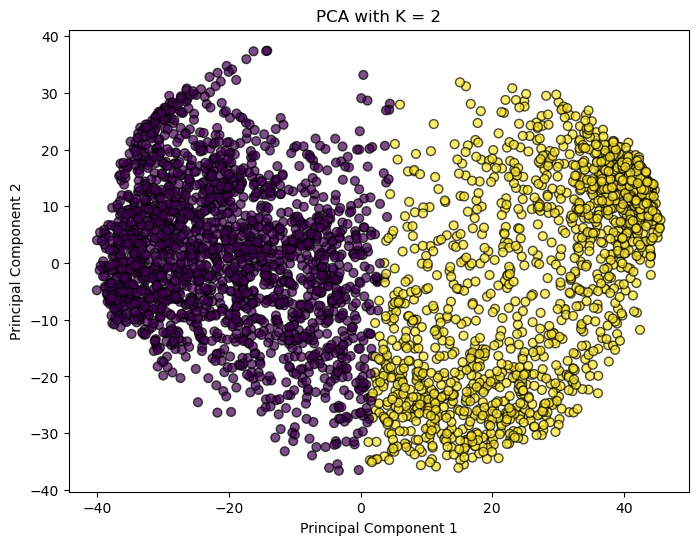

Number of Clusters: 3, Davies Bouldin Analysis Index: 1.75


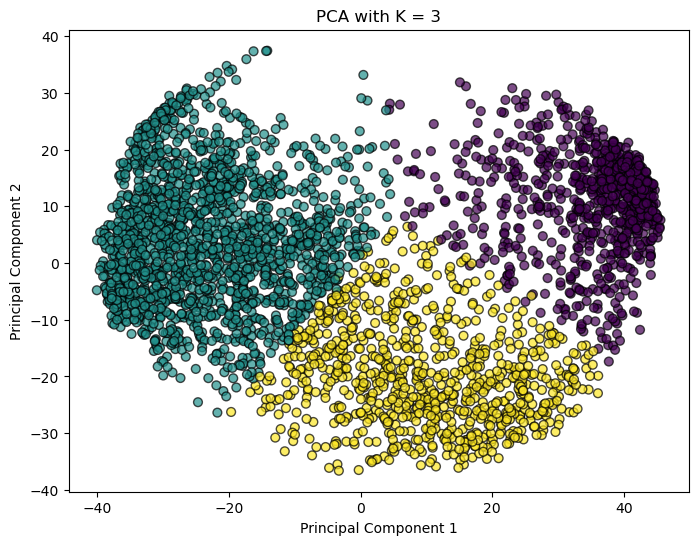

Number of Clusters: 4, Davies Bouldin Analysis Index: 2.43


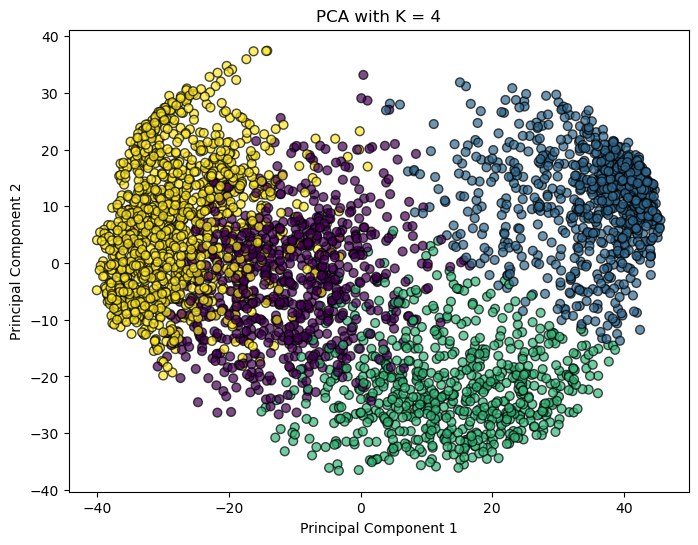

Number of Clusters: 5, Davies Bouldin Analysis Index: 2.42


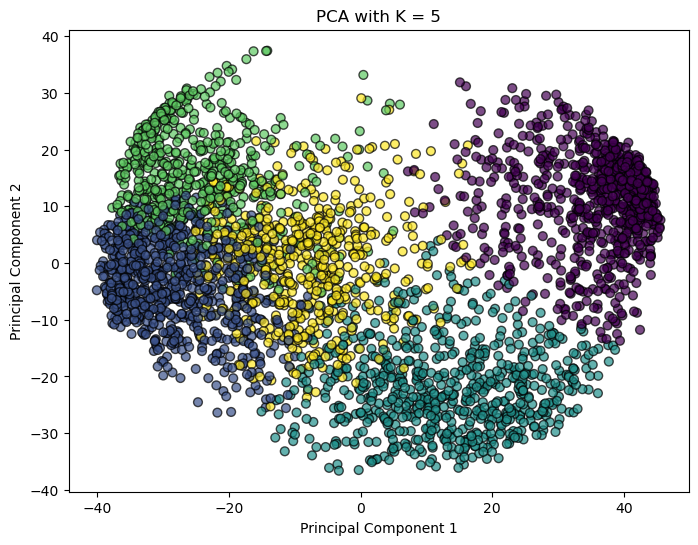

Number of Clusters: 6, Davies Bouldin Analysis Index: 2.50


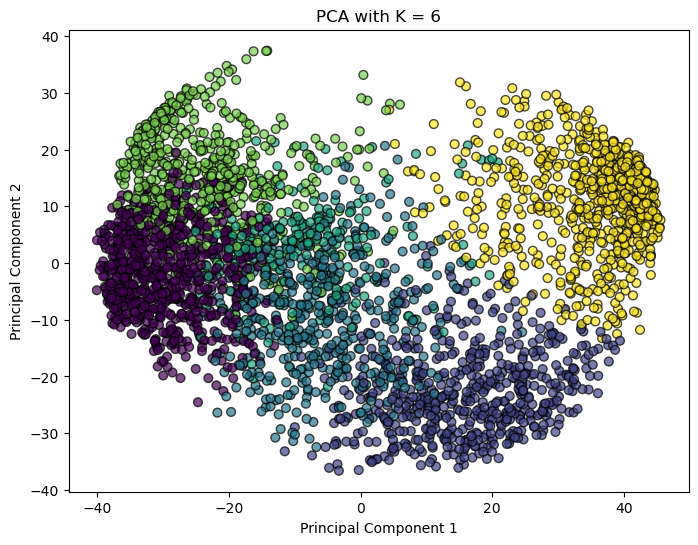

Number of Clusters: 8, Davies Bouldin Analysis Index: 2.52


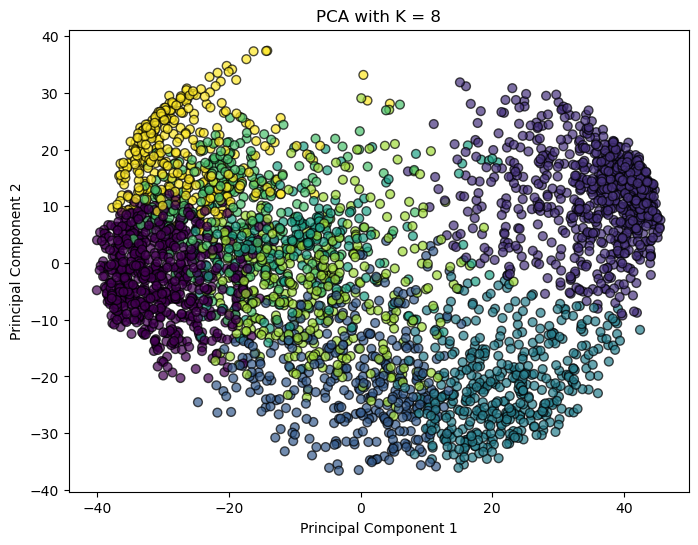

In [4]:
n_cluster = [2, 3, 4, 5, 6, 8]

for clusters in n_cluster:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(df)
    
    davies_bouldin_index = davies_bouldin_score(df, cluster_labels)
    print(f'Number of Clusters: {clusters}, Davies Bouldin Analysis Index: {davies_bouldin_index:.2f}')
    
    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(df)
    plt.figure(figsize = (8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = .7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


## Silhouette analysis for K-means clustering

The last analysis we are doing to evaluate K-means clustering performance is the Silhouette Coefficient, where a higher Silhouette Coefficient score relates to a model with better defined clusters. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering, and scores around zero indicate overlapping clusters. 

The Silhouette Coefficient is defined for each sample and is composed of two scores:
a: The mean distance between a sample and all other points in the same class.
b: The mean distance between a sample and all other points in the next nearest cluster.

The Silhouette Coefficient s for a single sample is then given as:
s = (b-a)/max(a, b)

Number of Clusters: 2, Silhouette Score: 0.26


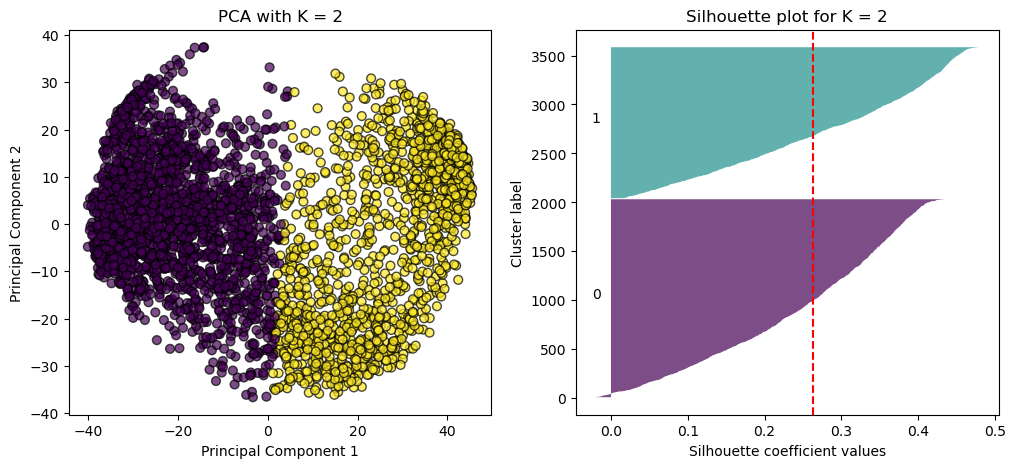

Number of Clusters: 3, Silhouette Score: 0.23


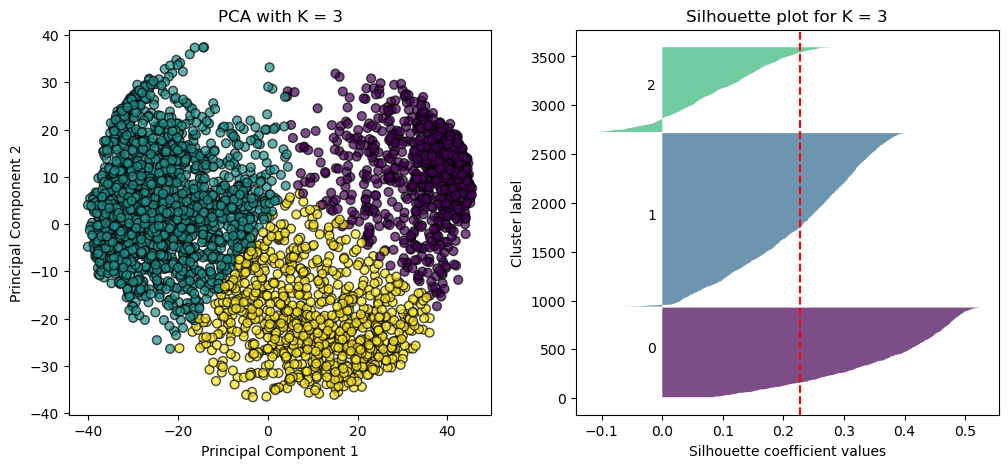

Number of Clusters: 4, Silhouette Score: 0.18


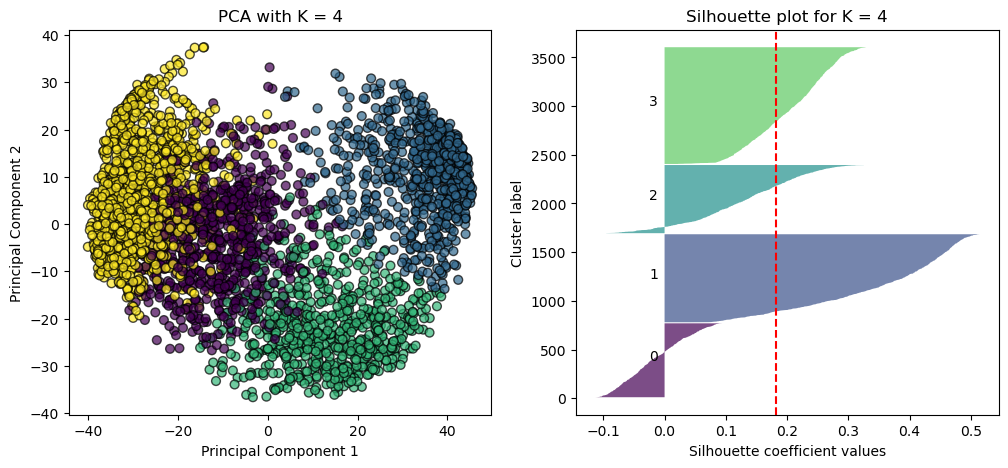

Number of Clusters: 5, Silhouette Score: 0.15


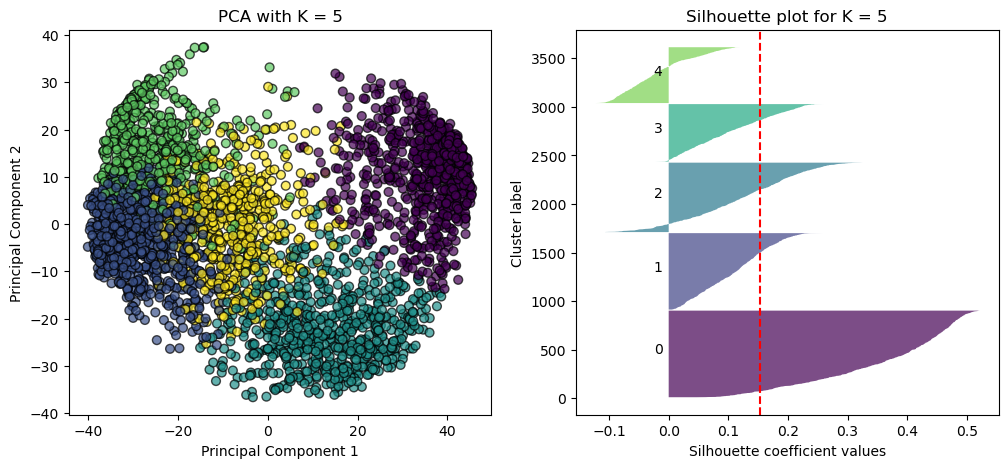

Number of Clusters: 6, Silhouette Score: 0.15


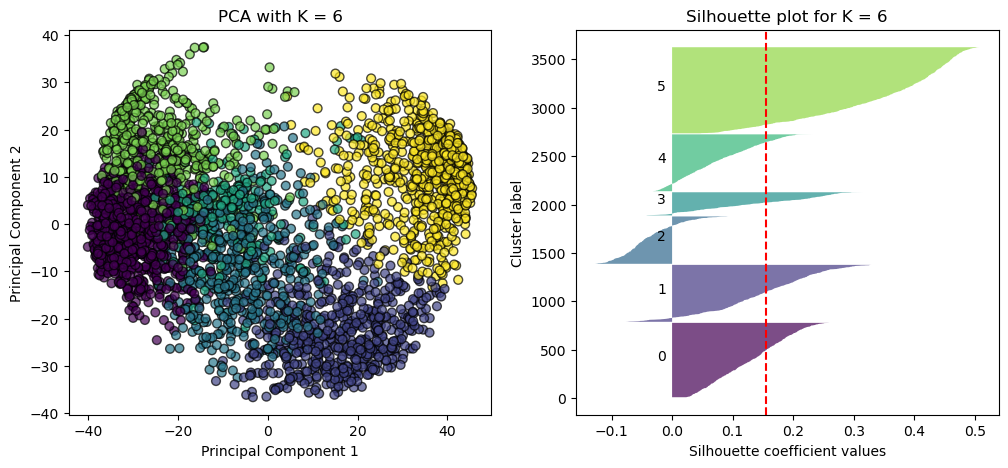

Number of Clusters: 8, Silhouette Score: 0.14


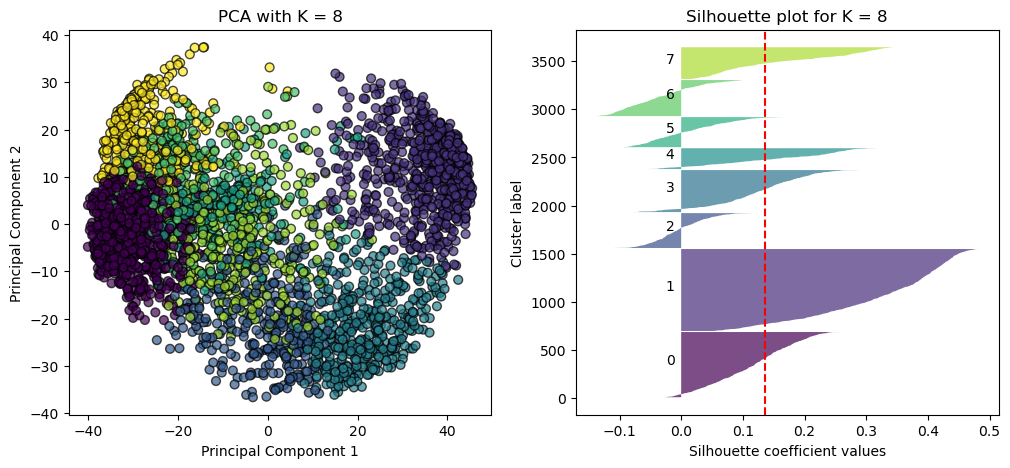

In [5]:
n_clusters = [2, 3, 4, 5, 6, 8]

for clusters in n_clusters:
    kmeans = KMeans(n_clusters = clusters, random_state = 42, n_init = 10)
    cluster_labels = kmeans.fit_predict(df)
    
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(f'Number of Clusters: {clusters}, Silhouette Score: {silhouette_avg:.2f}')

    pca = PCA(n_components = 2)
    pca_result = pca.fit_transform(df)
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c = cluster_labels, cmap = 'viridis', edgecolor = 'k', s = 40, alpha = 0.7)
    plt.title(f'PCA with K = {clusters}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.subplot(1, 2, 2)
    sample_silhouette_values = silhouette_samples(df, cluster_labels)
    y_lower = 10
    for i in range(clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.viridis(float(i) / clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, alpha=0.7)
        plt.text(-0.025, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    plt.axvline(x = silhouette_avg, color = "red", linestyle = "--")
    plt.title(f'Silhouette plot for K = {clusters}')
    plt.xlabel('Silhouette coefficient values')
    plt.ylabel('Cluster label')
    plt.show()


Afer testing K - means clustering performance using 3 different methods and obtaining inconsistent results, we can conclude that we need to use another clustering algorithm.